In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
# from mne.time_frequency import psd_welch


In [3]:
rest_path = "./EEG_arithmetic_task/subject00_1.edf"
task_path = "./EEG_arithmetic_task/subject00_2.edf"
rest = mne.io.read_raw_edf(rest_path, preload=True)
task = mne.io.read_raw_edf(task_path, preload=True)

Extracting EDF parameters from c:\Users\uiseong\OneDrive\바탕 화면\eeg\EEG_cognitive_load\EEG_arithmetic_task\subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from c:\Users\uiseong\OneDrive\바탕 화면\eeg\EEG_cognitive_load\EEG_arithmetic_task\subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


In [4]:
rest.ch_names

['EEG Fp1',
 'EEG Fp2',
 'EEG F3',
 'EEG F4',
 'EEG F7',
 'EEG F8',
 'EEG T3',
 'EEG T4',
 'EEG C3',
 'EEG C4',
 'EEG T5',
 'EEG T6',
 'EEG P3',
 'EEG P4',
 'EEG O1',
 'EEG O2',
 'EEG Fz',
 'EEG Cz',
 'EEG Pz',
 'EEG A2-A1',
 'ECG ECG']

In [13]:
print(rest.info)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.096 (s)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.096 (s)


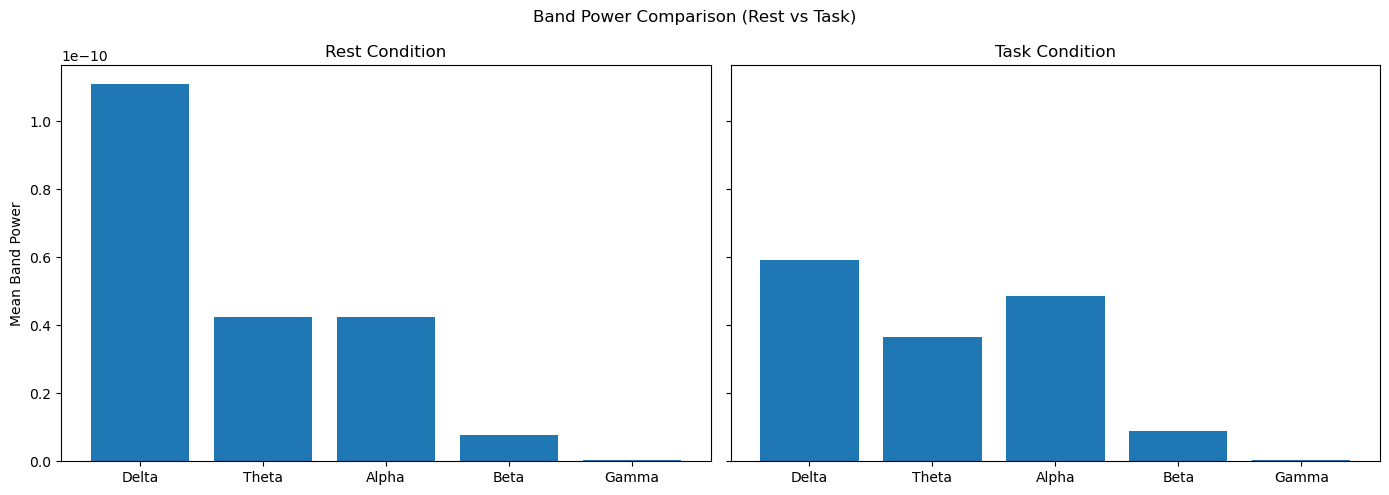


--- Alpha / Theta Band Power ---
Alpha (Rest): 0.0000
Alpha (Task): 0.0000
Theta (Rest): 0.0000
Theta (Task): 0.0000


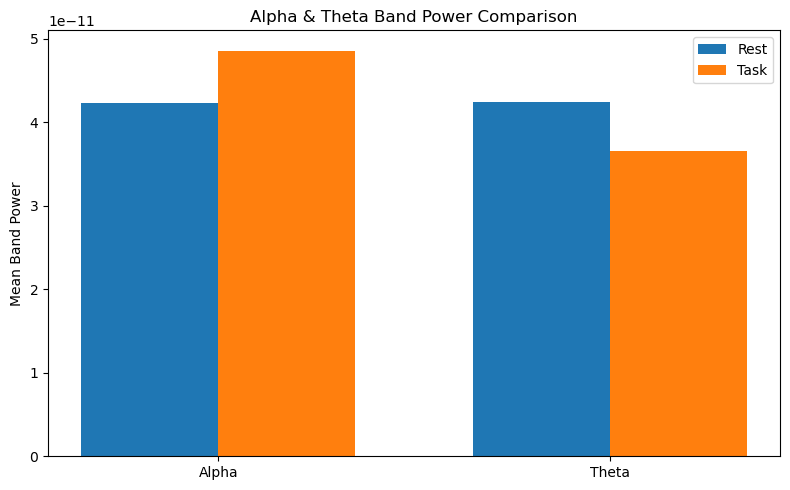

In [17]:
def compute_band_powers(raw, bands, fmin=1, fmax=40, n_fft=2048):
    raw.pick_types(eeg=True)
    psd = raw.compute_psd(fmin=fmin, fmax=fmax, n_fft=n_fft)
    psds, freqs = psd.get_data(return_freqs=True)

    band_powers = {}
    for band, (low, high) in bands.items():
        idx_band = np.logical_and(freqs >= low, freqs <= high)
        band_power = psds[:, idx_band].mean(axis=1)
        band_powers[band] = band_power
    return band_powers

# 밴드 정의
bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Gamma': (30, 40)
}


# 밴드 파워 계산
rest_band_powers = compute_band_powers(rest.copy(), bands)
task_band_powers = compute_band_powers(task.copy(), bands)

# 평균 파워 추출
rest_means = [np.mean(rest_band_powers[band]) for band in bands]
task_means = [np.mean(task_band_powers[band]) for band in bands]

# 시각화
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Rest subplot
axs[0].bar(bands.keys(), rest_means)
axs[0].set_title("Rest Condition")
axs[0].set_ylabel("Mean Band Power")

# Task subplot
axs[1].bar(bands.keys(), task_means)
axs[1].set_title("Task Condition")

plt.suptitle("Band Power Comparison (Rest vs Task)")
plt.tight_layout()
plt.show()

# Alpha, Theta 밴드 평균 파워 수치 출력
alpha_rest = np.mean(rest_band_powers['Alpha'])
alpha_task = np.mean(task_band_powers['Alpha'])
theta_rest = np.mean(rest_band_powers['Theta'])
theta_task = np.mean(task_band_powers['Theta'])

print("\n--- Alpha / Theta Band Power ---")
print(f"Alpha (Rest): {alpha_rest:.4f}")
print(f"Alpha (Task): {alpha_task:.4f}")
print(f"Theta (Rest): {theta_rest:.4f}")
print(f"Theta (Task): {theta_task:.4f}")

# Alpha / Theta 파워만 시각화
labels = ['Alpha', 'Theta']
rest_values = [alpha_rest, theta_rest]
task_values = [alpha_task, theta_task]

x = np.arange(len(labels))  # [0, 1]
width = 0.35  # 막대 너비

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, rest_values, width, label='Rest')
bars2 = ax.bar(x + width/2, task_values, width, label='Task')

ax.set_ylabel('Mean Band Power')
ax.set_title('Alpha & Theta Band Power Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()


In [38]:
rest_path = "./EEG_arithmetic_task/subject05_1.edf"
task_path = "./EEG_arithmetic_task/subject05_2.edf"
rest = mne.io.read_raw_edf(rest_path, preload=True)
task = mne.io.read_raw_edf(task_path, preload=True)

Extracting EDF parameters from c:\Users\uiseong\OneDrive\바탕 화면\eeg\캡스톤\EEG_arithmetic_task\subject05_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from c:\Users\uiseong\OneDrive\바탕 화면\eeg\캡스톤\EEG_arithmetic_task\subject05_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.096 (s)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.096 (s)


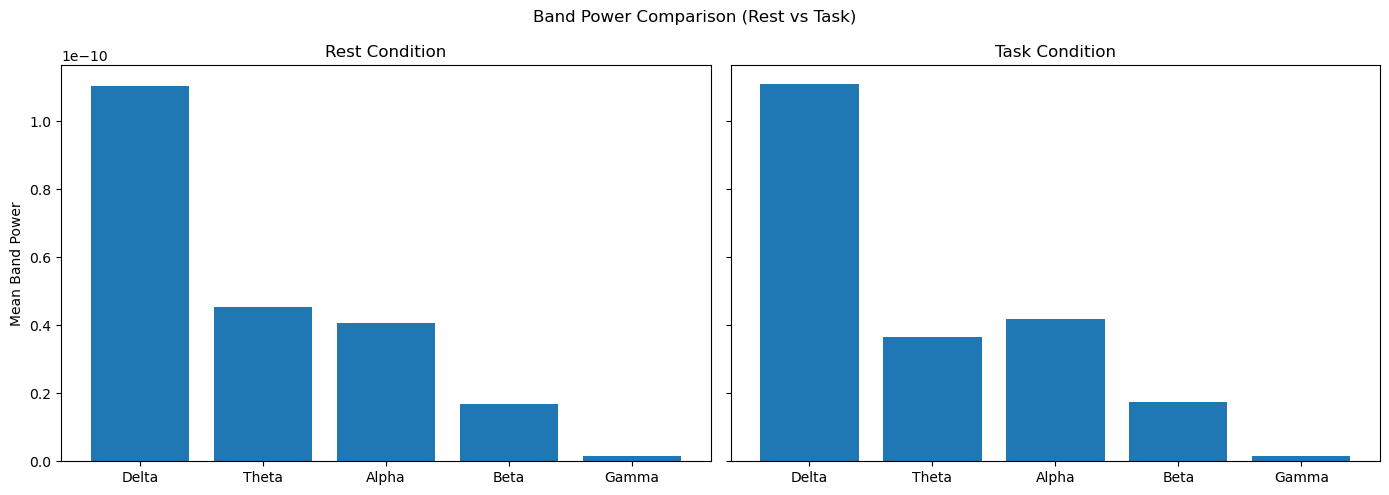


--- Alpha / Theta Band Power ---
Alpha (Rest): 0.0000
Alpha (Task): 0.0000
Theta (Rest): 0.0000
Theta (Task): 0.0000


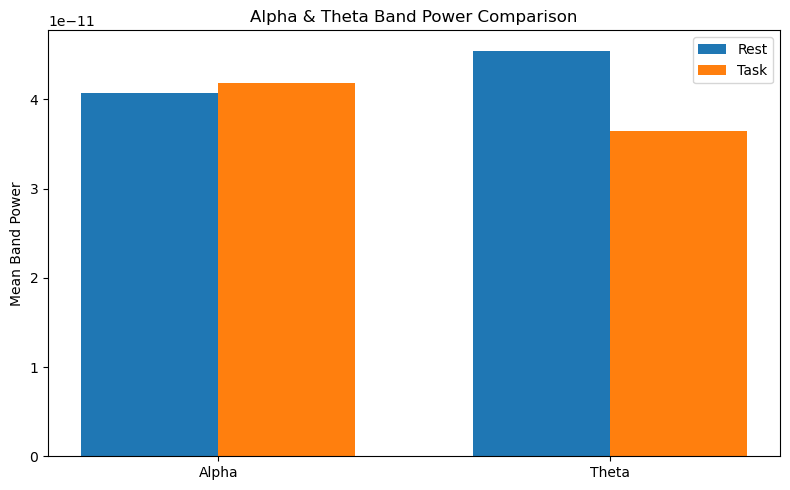

In [39]:

# 밴드 파워 계산
rest_band_powers = compute_band_powers(rest.copy(), bands)
task_band_powers = compute_band_powers(task.copy(), bands)

# 평균 파워 추출
rest_means = [np.mean(rest_band_powers[band]) for band in bands]
task_means = [np.mean(task_band_powers[band]) for band in bands]

# 시각화
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Rest subplot
axs[0].bar(bands.keys(), rest_means)
axs[0].set_title("Rest Condition")
axs[0].set_ylabel("Mean Band Power")

# Task subplot
axs[1].bar(bands.keys(), task_means)
axs[1].set_title("Task Condition")

plt.suptitle("Band Power Comparison (Rest vs Task)")
plt.tight_layout()
plt.show()

# Alpha, Theta 밴드 평균 파워 수치 출력
alpha_rest = np.mean(rest_band_powers['Alpha'])
alpha_task = np.mean(task_band_powers['Alpha'])
theta_rest = np.mean(rest_band_powers['Theta'])
theta_task = np.mean(task_band_powers['Theta'])

print("\n--- Alpha / Theta Band Power ---")
print(f"Alpha (Rest): {alpha_rest:.4f}")
print(f"Alpha (Task): {alpha_task:.4f}")
print(f"Theta (Rest): {theta_rest:.4f}")
print(f"Theta (Task): {theta_task:.4f}")

# Alpha / Theta 파워만 시각화
labels = ['Alpha', 'Theta']
rest_values = [alpha_rest, theta_rest]
task_values = [alpha_task, theta_task]

x = np.arange(len(labels))  # [0, 1]
width = 0.35  # 막대 너비

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, rest_values, width, label='Rest')
bars2 = ax.bar(x + width/2, task_values, width, label='Task')

ax.set_ylabel('Mean Band Power')
ax.set_title('Alpha & Theta Band Power Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()


In [2]:

# 2. PSD 계산 (Alpha: 8–13Hz, Theta: 4–8Hz)
alpha_rest = rest.compute_psd(fmin=8, fmax=13, method="welch")
alpha_task = task.compute_psd(fmin=8, fmax=13, method="welch")

theta_rest = rest.compute_psd(fmin=4, fmax=8, method="welch")
theta_task = task.compute_psd(fmin=4, fmax=8, method="welch")

# 3. 평균 파워 계산
alpha_rest_power = alpha_rest.get_data().mean()
alpha_task_power = alpha_task.get_data().mean()
theta_rest_power = theta_rest.get_data().mean()
theta_task_power = theta_task.get_data().mean()

# 4. ERD/ERS 계산 (%)
alpha_erd_ers = (alpha_rest_power - alpha_task_power) / alpha_rest_power * 100
theta_erd_ers = (theta_rest_power - theta_task_power) / theta_rest_power * 100

# 5. 결과 출력
print(f"Alpha ERD/ERS (%): {alpha_erd_ers:.2f}")
print(f"Theta ERD/ERS (%): {theta_erd_ers:.2f}")

NameError: name 'rest' is not defined